In [2]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\mhudd\OneDrive\Documents\Data Analytics Bootcamp 2024\Portfolio Files\Portfolio Website Assets\Projects\movies.csv')


In [3]:
# Run the dataframe

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Winnie the Pooh,G,Animation,2011,2011-07-15,7.2,23000,Stephen J. Anderson,Stephen J. Anderson,Jim Cummings,United States,30000000,49871429,Walt Disney Pictures,63
1,The Land Before Time,G,Animation,1988,1988-11-18,7.4,82000,Don Bluth,Stu Krieger,Pat Hingle,United States,12500000,84460846,Lucasfilm,69
2,Following,R,Crime,1998,1999-11-05,7.5,89000,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69
3,Once Upon a Forest,G,Animation,1993,1993-06-18,6.5,5200,Charles Grosvenor,Rae Lambert,Michael Crawford,United Kingdom,13000000,6582052,Hanna-Barbera Productions,71
4,Peter Pan 2: Return to Never Land,G,Animation,2002,2002-02-15,5.8,19000,Robin Budd,Temple Mathews,Blayne Weaver,United States,20000000,115121981,Disney Television Animation,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Heaven's Gate,R,Adventure,1980,1981-04-24,6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219
5417,Gods and Generals,PG-13,Biography,2003,2003-02-21,6.3,16000,Ron Maxwell,Jeff Shaara,Stephen Lang,United States,56000000,12923936,Turner Pictures (I),219
5418,Once Upon a Time in America,R,Crime,1984,1984-06-01,8.4,321000,Sergio Leone,Harry Grey,Robert De Niro,Italy,30000000,5473212,The Ladd Company,229
5419,Hamlet,PG-13,Drama,1996,1996-12-25,7.7,37000,Kenneth Branagh,William Shakespeare,Kenneth Branagh,United Kingdom,18000000,4770222,Castle Rock Entertainment,242


In [3]:
# We can also just look a the first 5 records to get a quick look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Winnie the Pooh,G,Animation,2011,2011-07-15,7.2,23000,Stephen J. Anderson,Stephen J. Anderson,Jim Cummings,United States,30000000,49871429,Walt Disney Pictures,63
1,The Land Before Time,G,Animation,1988,1988-11-18,7.4,82000,Don Bluth,Stu Krieger,Pat Hingle,United States,12500000,84460846,Lucasfilm,69
2,Following,R,Crime,1998,1999-11-05,7.5,89000,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69
3,Once Upon a Forest,G,Animation,1993,1993-06-18,6.5,5200,Charles Grosvenor,Rae Lambert,Michael Crawford,United Kingdom,13000000,6582052,Hanna-Barbera Productions,71
4,Peter Pan 2: Return to Never Land,G,Animation,2002,2002-02-15,5.8,19000,Robin Budd,Temple Mathews,Blayne Weaver,United States,20000000,115121981,Disney Television Animation,72


In [4]:
# Let's see if there is any missing data

# This shows us the percentage of missing data in the columns

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [5]:
# Look at he data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [6]:
# Removing trailing decimal places from budget and gross columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [22]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Winnie the Pooh,G,Animation,2011,"July 15, 2011 (United States)",7.2,23000,Stephen J. Anderson,Stephen J. Anderson,Jim Cummings,United States,30000000,49871429,Walt Disney Pictures,63
1,The Land Before Time,G,Animation,1988,"November 18, 1988 (United States)",7.4,82000,Don Bluth,Stu Krieger,Pat Hingle,United States,12500000,84460846,Lucasfilm,69
2,Following,R,Crime,1998,"November 5, 1999 (United Kingdom)",7.5,89000,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69
3,Once Upon a Forest,G,Animation,1993,"June 18, 1993 (United States)",6.5,5200,Charles Grosvenor,Rae Lambert,Michael Crawford,United Kingdom,13000000,6582052,Hanna-Barbera Productions,71
4,Peter Pan 2: Return to Never Land,G,Animation,2002,"February 15, 2002 (United States)",5.8,19000,Robin Budd,Temple Mathews,Blayne Weaver,United States,20000000,115121981,Disney Television Animation,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219
5417,Gods and Generals,PG-13,Biography,2003,"February 21, 2003 (United States)",6.3,16000,Ron Maxwell,Jeff Shaara,Stephen Lang,United States,56000000,12923936,Turner Pictures (I),219
5418,Once Upon a Time in America,R,Crime,1984,"June 1, 1984 (United States)",8.4,321000,Sergio Leone,Harry Grey,Robert De Niro,Italy,30000000,5473212,The Ladd Company,229
5419,Hamlet,PG-13,Drama,1996,"December 25, 1996 (United States)",7.7,37000,Kenneth Branagh,William Shakespeare,Kenneth Branagh,United Kingdom,18000000,4770222,Castle Rock Entertainment,242


In [7]:
# In the data there are 2 columns that contain year realesed

# The year column contains just the year the movie was released and the released column contains the actaul date and year
# the movie was released.

# There are issues with the data as some of the years in the year column do not match the actual released date

# We want to use the actual release date in the released column as the officail release year

# To do this we don't want to deleted the released column, instead we will add a new column 'officialreleaseyear'

# Create a column to correct release year

df['officialreleaseyer'] = df['released'].astype(str).str[:4]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,officialreleaseyer
0,Winnie the Pooh,G,Animation,2011,2011-07-15,7.2,23000,Stephen J. Anderson,Stephen J. Anderson,Jim Cummings,United States,30000000,49871429,Walt Disney Pictures,63,2011
1,The Land Before Time,G,Animation,1988,1988-11-18,7.4,82000,Don Bluth,Stu Krieger,Pat Hingle,United States,12500000,84460846,Lucasfilm,69,1988
2,Following,R,Crime,1998,1999-11-05,7.5,89000,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69,1999
3,Once Upon a Forest,G,Animation,1993,1993-06-18,6.5,5200,Charles Grosvenor,Rae Lambert,Michael Crawford,United Kingdom,13000000,6582052,Hanna-Barbera Productions,71,1993
4,Peter Pan 2: Return to Never Land,G,Animation,2002,2002-02-15,5.8,19000,Robin Budd,Temple Mathews,Blayne Weaver,United States,20000000,115121981,Disney Television Animation,72,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Heaven's Gate,R,Adventure,1980,1981-04-24,6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219,1981
5417,Gods and Generals,PG-13,Biography,2003,2003-02-21,6.3,16000,Ron Maxwell,Jeff Shaara,Stephen Lang,United States,56000000,12923936,Turner Pictures (I),219,2003
5418,Once Upon a Time in America,R,Crime,1984,1984-06-01,8.4,321000,Sergio Leone,Harry Grey,Robert De Niro,Italy,30000000,5473212,The Ladd Company,229,1984
5419,Hamlet,PG-13,Drama,1996,1996-12-25,7.7,37000,Kenneth Branagh,William Shakespeare,Kenneth Branagh,United Kingdom,18000000,4770222,Castle Rock Entertainment,242,1996


In [8]:
# Now we'll sort the data by gross revenue

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,officialreleaseyer
5348,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
5394,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
5409,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
5097,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
5274,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,Tanner Hall,R,Drama,2009,2015-01-15,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
1637,Philadelphia Experiment II,PG-13,Action,1993,1994-06-04,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3070,Ginger Snaps,Not Rated,Drama,2000,2001-05-11,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
226,Parasite,R,Horror,1982,1982-03-12,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


In [9]:
# This only show a sample of the data

# To see all of the data do as follows

pd.set_option('display.max_rows', None)

In [4]:
# Now rerun dataframe to see all of the data

# df

# I commented out the dataframe call above so I can just run the df.head() command to shorten the number of results

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Winnie the Pooh,G,Animation,2011,2011-07-15,7.2,23000,Stephen J. Anderson,Stephen J. Anderson,Jim Cummings,United States,30000000,49871429,Walt Disney Pictures,63
1,The Land Before Time,G,Animation,1988,1988-11-18,7.4,82000,Don Bluth,Stu Krieger,Pat Hingle,United States,12500000,84460846,Lucasfilm,69
2,Following,R,Crime,1998,1999-11-05,7.5,89000,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69
3,Once Upon a Forest,G,Animation,1993,1993-06-18,6.5,5200,Charles Grosvenor,Rae Lambert,Michael Crawford,United Kingdom,13000000,6582052,Hanna-Barbera Productions,71
4,Peter Pan 2: Return to Never Land,G,Animation,2002,2002-02-15,5.8,19000,Robin Budd,Temple Mathews,Blayne Weaver,United States,20000000,115121981,Disney Television Animation,72


In [5]:
# I'm rerunning the sort on gross dollars from above and assigning it to "dfsorted" so I can just rerun "dfsorted"
# going forward and don't have to rewrite or paste it again

dfsorted = df.sort_values(by=['gross'], inplace=False, ascending=False)

dfsorted.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5348,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
5394,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
5409,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
5097,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
5274,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [10]:
# New check to see if there are any duplicates in fields where we don't want duplicates

# This data is very unique because all none of the fields are unique, meaning all of the column can allow for 
# duplicates.  For example, there could be multiple movies named "Titanic" as well as "James Cameron" has directed 
# multiple movies on this list.

# If there was a field such isbn# like library books that were duplicated we'd want to remove he duplicate record

# We'd do that as follows but I will comment the code out as to not accidently run it

# First this is how to display all of the unique results in a column, specifically the "company" field

# This gives us a distinct count essentially

df['company'].drop_duplicates().sort_values(ascending=False)

573                                 thefyzz
4873                            micro_scope
2172                               i5 Films
2426                             i am OTHER
1399                                   erbp
                       ...                 
2908                       1818 Productions
501                           1492 Pictures
1361                        .406 Production
3505    "Weathering With You" Film Partners
3176        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

In [11]:
# If we removed the "drop_duplicates()" we will see all of the results including duplicates

df['company'].sort_values(ascending=False)

573                                 thefyzz
4873                            micro_scope
2172                               i5 Films
2426                             i am OTHER
1399                                   erbp
                       ...                 
501                           1492 Pictures
4892                          1492 Pictures
1361                        .406 Production
3505    "Weathering With You" Film Partners
3176        "DIA" Productions GmbH & Co. KG
Name: company, Length: 5421, dtype: object

In [17]:
# Here's how we would remove the duplicates if we wanted to

# For this project we are not removing the duplicates based on the data

# Drop duplicates found in the "company" filed
# df['company'] = df['company'].drop_duplicates()

# Drop dupicates for the entire table
# df.drop_duplicates()

In [19]:
# New the data is clean we are ready to analyze the data

# Hypothesis - The higher the budget the more gross revenue the movie will bring in (High Correlation)

# Hypothesis - The most renowned companies will have the highest grossing movies (High Correlation)

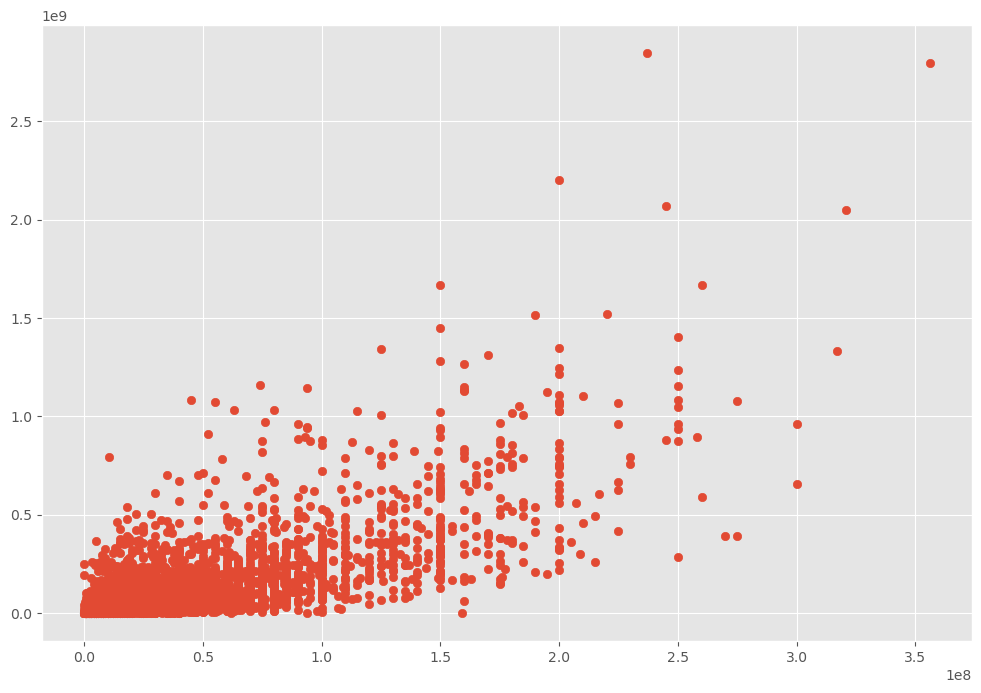

In [20]:
# Scatter plot - Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.show()

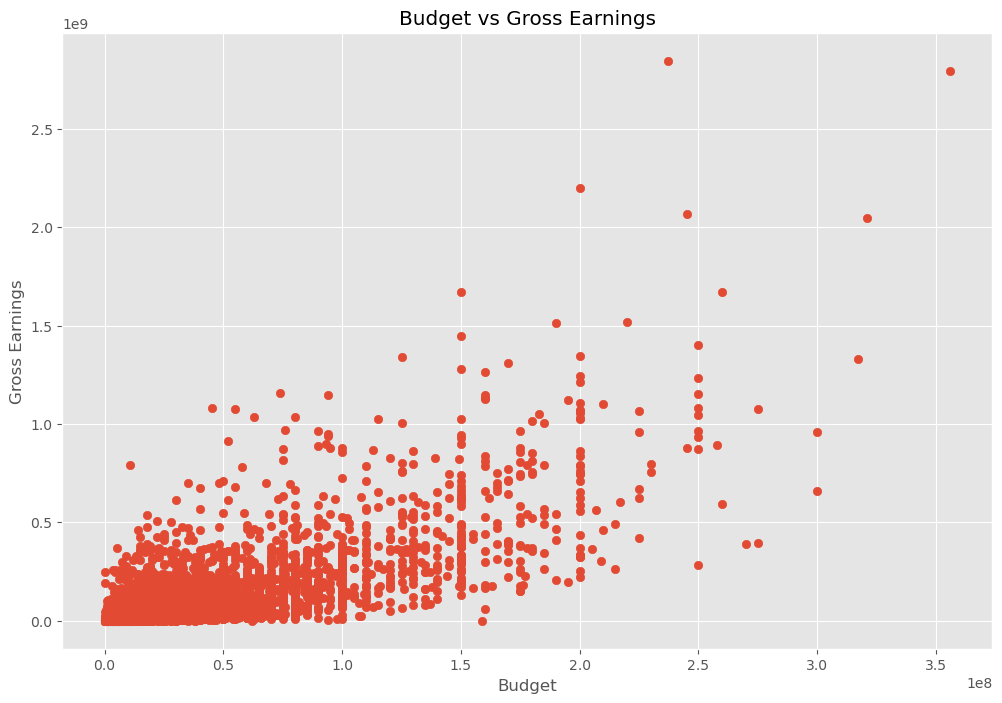

In [35]:
# This is hard to read so we'll modify to make it easier to read

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')

plt.ylabel('Gross Earnings')

plt.show()

In [36]:
# New we want to analyze our hypothesis by using a regession to see if budget does correlate to gross earnings

# Plot the regression line using seaborn

sns.regplot(data=df, x='budget', y='gross')

<Axes: xlabel='budget', ylabel='gross'>

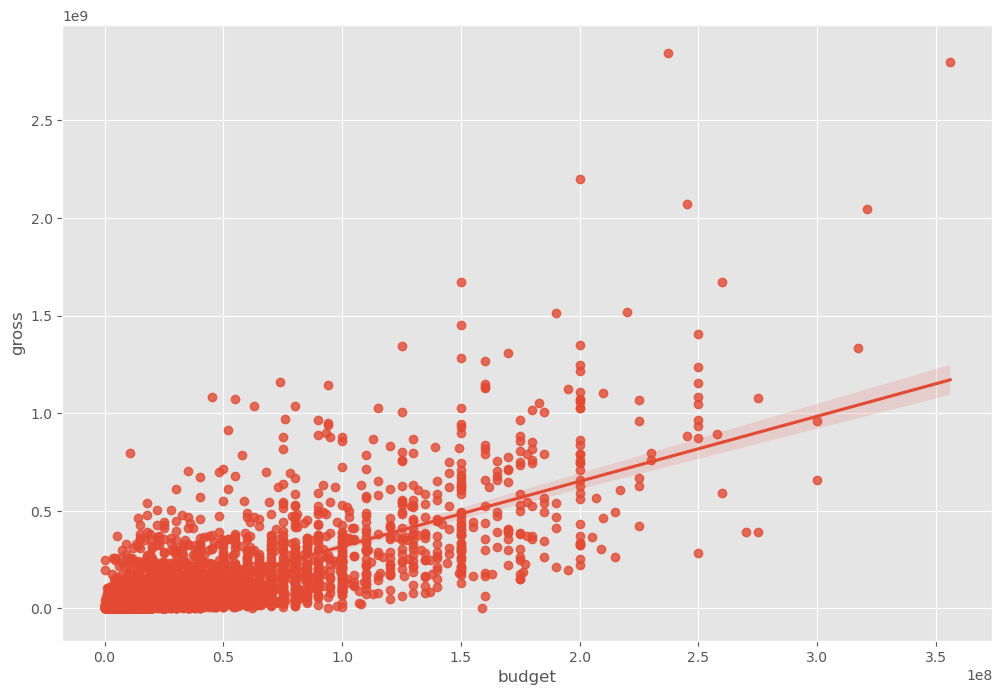

In [37]:
plt.show()

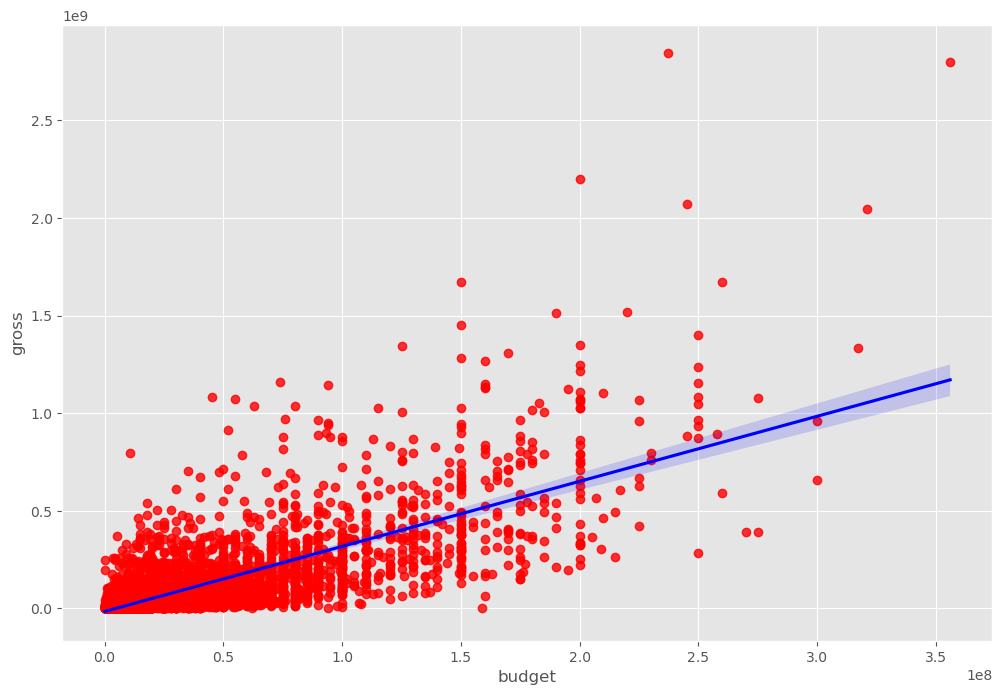

In [39]:
# From first glance we can see that there is correlation but we will see how much shortly

# First we're going add some info so it looks better

sns.regplot(data=df, x='budget', y='gross', scatter_kws={"color": "red"}, line_kws={"color": "blue"})

plt.show()

In [51]:
#  Now we'll see the correlation

# There are many different types of correlation:  pearson, kendall, spearman

# They all correlate the data a little differently from each other

# Here is the person correlation

df.corr(method='pearson', numeric_only =True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [52]:
# The data above shows a 0.740247 correlation between budget and gross earnings which a a strong positive correlation
# This indicated that as budget rises gross revenue is also tends to rise

# A pearson correlation closer to 0 indicates no correlation

# A negative pearson correlation indicates an inverse correlation where as one increases the other decreases


In [53]:
# Now let's look at the same data based on the kendall correlation

df.corr(method='kendall', numeric_only =True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [54]:
# The data above shows a 0.512057 correlation coefficient between budget and gross earnings

# As with pearson closest to 0 or 0 show little no no correlation and the closer to 1 or -1 show postive or inverse correleation


In [55]:
df.corr(method='spearman', numeric_only =True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


In [56]:
# The data above shows a 0.692958 correlation coefficient between budget and gross earnings

# As with pearson closest to 0 or 0 show little no no correlation and the closer to 1 or -1 show postive or inverse correleation

In [57]:
# It is important to know what regression model to use for the data

# For this project we will use the default pearson regression

df.corr(method='pearson', numeric_only =True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [58]:
# Now we can see that there is a high correlation between budget and gross earnings
# Our hypothesis is correct

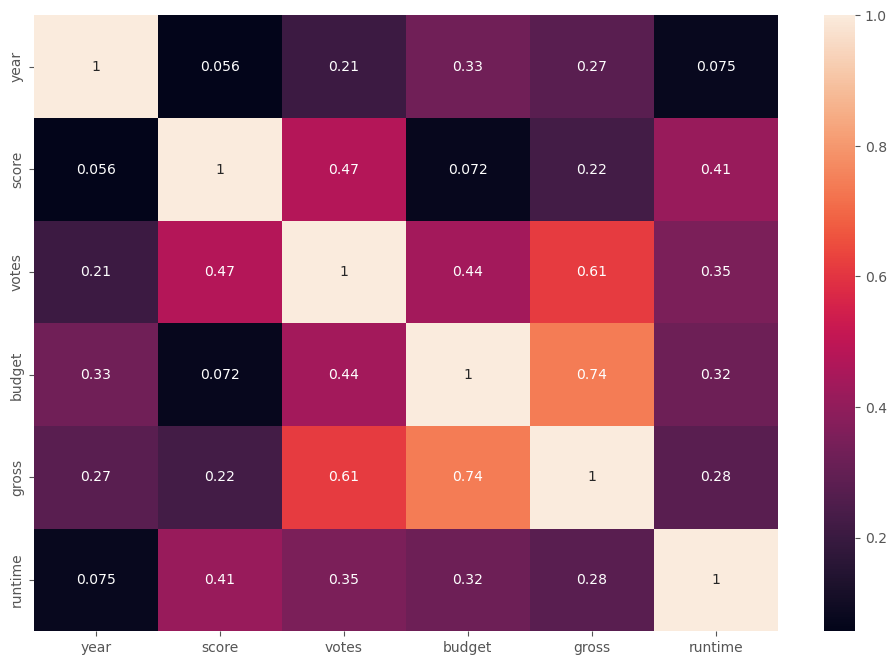

In [59]:
# Now lets visualize the correlations (correlation matrix)

correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.show()

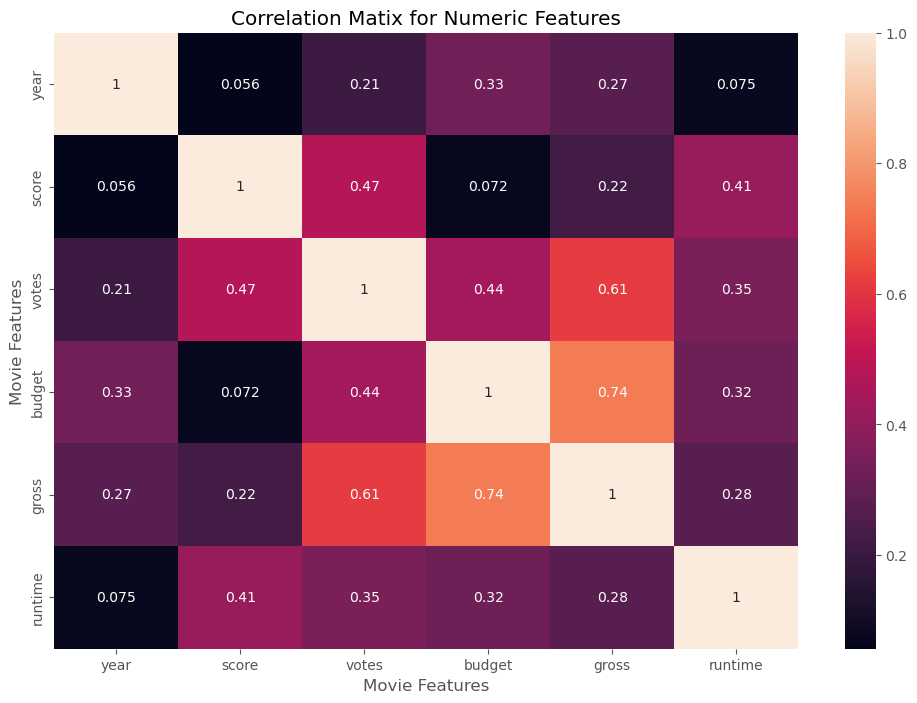

In [60]:
# Now we'll add titles to make it more useable

correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [5]:
# Now lets look at hypothesis 2

# Does the production company of the movie have an effect on the gross earnings (High Correlation)?

# We first have an issue - The company column is not numeric which causes an error

# We have to convert the company field to a unique numeric representation of the company name

# We are going to do this to all fields but we could just do this to the company column

# By doing them all at one time it allows us to look at the correllations between all of the columns as we please

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,5249,1,2,2011,1819,7.2,23000,1814,2828,832,47,30000000,49871429,1423,63
1,4344,1,2,1988,401,7.4,82000,493,2890,1348,47,12500000,84460846,945,69
2,1461,6,5,1998,1054,7.5,89000,317,515,812,46,6000,48482,1053,69
3,2834,1,2,1993,658,6.5,5200,265,2454,1221,46,13000000,6582052,762,71
4,2962,1,2,2002,1202,5.8,19000,1678,2931,176,47,20000000,115121981,532,72


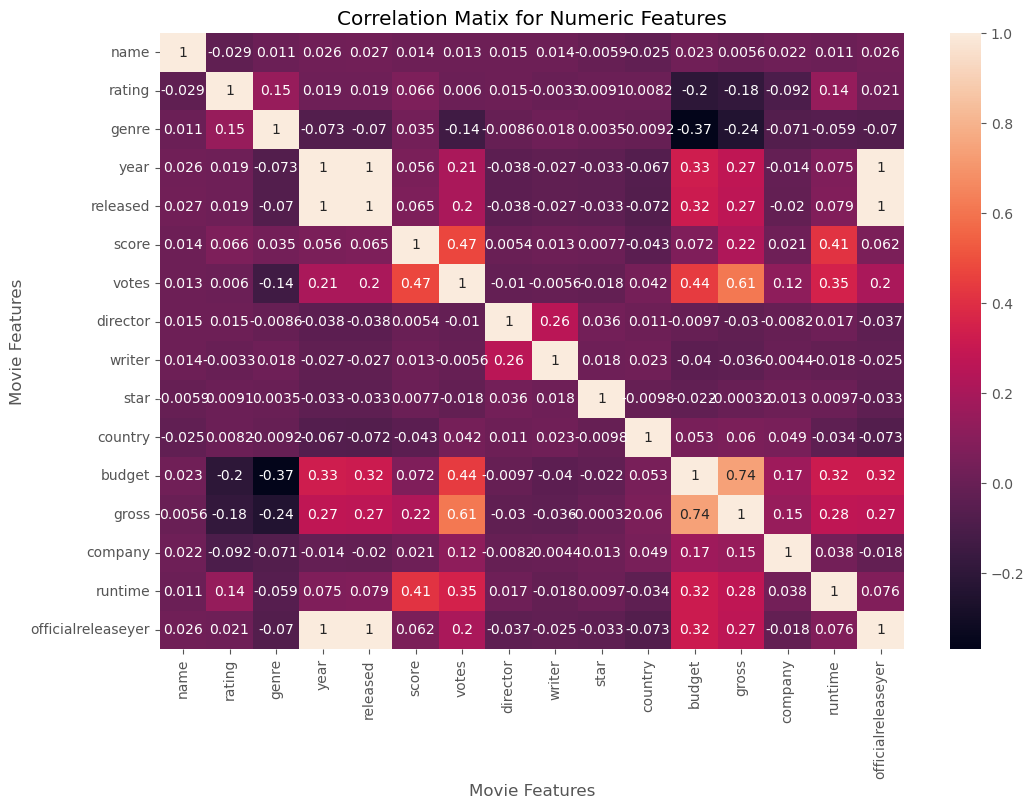

In [64]:
# As we can see the data above, now all of the data has been changed to a numeric value where it was not before

# Notice budget and gross were not modified

# Now each column has a unique identifier and can be plotted

# Now we can run our correllation

correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [65]:
# Here's the data behind the visualization above

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,officialreleaseyer
name,1.000000,-0.029234,0.010996,0.025542,0.027290,0.014450,0.012615,0.015246,0.013828,-0.005938,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025764
rating,-0.029234,1.000000,0.147796,0.019499,0.019099,0.065983,0.006031,0.014656,-0.003281,0.009063,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.020833
genre,0.010996,0.147796,1.000000,-0.073167,-0.070363,0.035106,-0.135990,-0.008553,0.017749,0.003494,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069865
year,0.025542,0.019499,-0.073167,1.000000,0.997319,0.056386,0.206021,-0.038354,-0.026663,-0.032901,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998210
released,0.027290,0.019099,-0.070363,0.997319,1.000000,0.065390,0.204543,-0.037969,-0.027125,-0.032677,-0.072089,0.320797,0.272843,-0.019607,0.079273,0.998464
score,0.014450,0.065983,0.035106,0.056386,0.065390,1.000000,0.474256,0.005413,0.013243,0.007694,-0.043051,0.072001,0.222556,0.020656,0.414068,0.062215
votes,0.012615,0.006031,-0.135990,0.206021,0.204543,0.474256,1.000000,-0.010376,-0.005614,-0.017935,0.041551,0.439675,0.614751,0.118470,0.352303,0.203614
director,0.015246,0.014656,-0.008553,-0.038354,-0.037969,0.005413,-0.010376,1.000000,0.261520,0.036360,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.036625
writer,0.013828,-0.003281,0.017749,-0.026663,-0.027125,0.013243,-0.005614,0.261520,1.000000,0.018461,0.022705,-0.039936,-0.036214,-0.004425,-0.017947,-0.025407
star,-0.005938,0.009063,0.003494,-0.032901,-0.032677,0.007694,-0.017935,0.036360,0.018461,1.000000,-0.009770,-0.021931,-0.000325,0.013350,0.009719,-0.032746


In [66]:
# This is a lot of data

# Now we'll modify the data to only look at areas with high correlations

# To do this we'll do something called unstacking

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name                name                  1.000000
                    rating               -0.029234
                    genre                 0.010996
                    year                  0.025542
                    released              0.027290
                    score                 0.014450
                    votes                 0.012615
                    director              0.015246
                    writer                0.013828
                    star                 -0.005938
                    country              -0.025490
                    budget                0.023392
                    gross                 0.005639
                    company               0.021697
                    runtime               0.010850
                    officialreleaseyer    0.025764
rating              name                 -0.029234
                    rating                1.000000
                    genre                 0.147796
                    year       

In [67]:
# Now the data above shows a quick way to see the correlations

# When we scroll down to gross we can see that both budget and votes have high correlation

In [68]:
# Here's another quick way to see the correlation

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre               budget               -0.368523
budget              genre                -0.368523
genre               gross                -0.244101
gross               genre                -0.244101
rating              budget               -0.203946
budget              rating               -0.203946
rating              gross                -0.181906
gross               rating               -0.181906
votes               genre                -0.135990
genre               votes                -0.135990
rating              company              -0.092357
company             rating               -0.092357
officialreleaseyer  country              -0.073221
country             officialreleaseyer   -0.073221
year                genre                -0.073167
genre               year                 -0.073167
country             released             -0.072089
released            country              -0.072089
company             genre                -0.071334
genre               company    

In [70]:
# The data above compares each combinaion to all other fields in a sorted list

# Now we can go further and only pull high correlations

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes               gross                 0.614751
gross               votes                 0.614751
                    budget                0.740247
budget              gross                 0.740247
released            year                  0.997319
year                released              0.997319
                    officialreleaseyer    0.998210
officialreleaseyer  year                  0.998210
                    released              0.998464
released            officialreleaseyer    0.998464
name                name                  1.000000
company             company               1.000000
gross               gross                 1.000000
budget              budget                1.000000
country             country               1.000000
star                star                  1.000000
writer              writer                1.000000
director            director              1.000000
votes               votes                 1.000000
score               score      

In [71]:
# Now to answer our second hypothisis - Company does not have a high correlation to gross earnings and is
# not the same effect on gross earnings as budget does.

# We also found an unexpected correlation between votes and gross earnings.  If a movie has a high number
# of award votes it has a positive effect on gross earnings.